# World's most complete palindrome?
In honor of the 20th of February, 2002, a palindromic date, Peter Norvig designed his [worlds longest unique palindromic sentence of 21,012 words](http://norvig.com/palindrome.html). With a new palindromic date approaching [on August 10, 2018 (8102018)](https://www.livescience.com/33583-palindrome-dates-21st-century-weird.html), I wanted to take some time to see if I could put my own spin on a palindrome world record. While Norvig focused on making his palindrome out of unique words, I just wanted to fit in as many words as possible.

The result is a palindrome which contains 64,810 unique phrases. I believe this palindrome contains every word from the noun-phrase dictionary that could possibly be included. 
This blogpost/notebook will explain what thought process I went through to create the most complete palindromic sentence. First I will briefly explain Norvig's approach and my own idea. Then I will delve into the solution Norvig provides. Lastly, I will explain in detail how I adapted his code to come to my palindromic sentence. 

## Palindrome statistics
Created for:	8-10-2018 (American notation)  
Words: 1,155,699  
Letters: 5,813,576  
Phrases: 954,401  
Unique noun phrases: 64,810  
Palindrome:	A man, a plan, Imo, Naida, ... ([more](https://github.com/rmeertens/palindromes/raw/master/longest_palindrome.txt)) ..., Adi, a nominal, Panama  
Storyboard:
![Storyboard](https://docs.google.com/drawings/d/e/2PACX-1vT5Rf2U62ZrlLT4XEh4-eG50HPNqPDfENJx_GpHpyIz9b6to2b7ljvHCKg9Osoc-4-QmxFrV2Y8CZIU/pub?w=1085&h=135)


Norvig set himself the task to find a palindrome that consisted of only unique words. By dropping this requirement, I was able to create much longer palindromic sentences. Having said that, finding the longest palindrome sentence is not the goal. Putting the word "radar" down a million times gives you a long palindrome, but it's far from impressive. What I wanted to do, was create a palindromic sentence with as many words of the English language in it as possible. Let's call this idea a "complete" palindromic sentence, and call Norvig's idea a "unique" palindromic sentence.

To understand my approach, it's best to first take a look at Peter Norvig's solution. He created his palindrome by [depth first searching](https://en.wikipedia.org/wiki/Depth-first_search) for letters that, when added in the middle, would simultaneously complete both sentences on the left and right of the palindrome. When a word on either the left or right side is complete, that word can't be used anymore. The image below is a shortened version of his approach in a simple graphic. I recommend [visiting his website](http://norvig.com/palindrome.html) for the best explanation. 

![image](https://docs.google.com/drawings/d/e/2PACX-1vSY4uM0gjlnh9hu6emhz8UWVk2CZkinZw_Zd99-OQ0z96UXFvz9O1pRsb-v_VAklCWd0jOc1Ea1mNMR/pub?w=960&h=720)


When starting this project I hoped it would be possible to create a sentence with every word in the English language. Although it might not be obvious immediately, this is an impossible task. Take the word Afghanistan. If we would have this word on the left of our palindrome, we would need to have it on the right as well. This means that part of the right part would be the reverse of "AFGHa". There is no word that starts with GFA, and no word that ends with HG, so there is no way to combine the part "HGFA" in either one or two words. We can thus never include the word Afghanistan in a palindrome. 

The next best thing was to create a palindrome that includes as many different words as possible. But how?

The key to include as many words as possible, is to use a structure you can keep adding to. If the mirror of a palindrome is within a word, you can't expand. By having the mirror in between two words, you can combine separate palindromic sentences into one large sentence. I'll give a simple example.
Let's say I have the sentences: "radar, radar", "a treble, Elberta", and "an iron, Norina". I can combine these to form the palindromic sentence "radar, a treble, an iron, Norina, Elberta, radar". The only challenge left is finding a palindromic sentence like this for every possible word.

I find these by splitting words in two, and finding a way to complete them into a palindromic sentence on the left of the word and on the right of the word. Take for example: "a plan". If we split "aplan" into "ap" and "lan", we have to find a palindromic sentence which contains a word that starts with "pa" (like "panama"). We also need that palindromic sentence to contain a word that ends in "nal" (like nominal). And then, repeat. 

![image](https://docs.google.com/drawings/d/e/2PACX-1vSwuQemcxCXHHb72OIs5V56-aFy3Gd14bYHNjX7wRWK1OQmX0Ola7p2Wkd8OtRERRwIXIKt3FY83kPY/pub?w=516&h=301)

Using this technique for the first time, I simply split an input word and tried to find a palindrome that started or ended with both parts of the words. However, I realised that this would not yield a solution for many long words. For example, the word "autocracies" can be split in "autoc" and "racies". Reversing "racies" we now search for a word that ends with "seicar", which does not exist. However, as "car" is a word, we can search for words that end with "sei". This could be "issei" ([a japanese person who migrated to the US](http://www.dictionary.com/browse/issei)). Thus I expanded my palindrome with 25% by being more flexible.

The above is a brief overview of my idea and thinking process. Below we get into the nitty gritty of the coding.


## Starting with Norvig's solution
Let's first take a look at the solution Norvig provides. He starts searching simultaneously left and right to come to a sentence which is ok from both sides. 


In [1]:
from collections import Counter, deque
import re
import random
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt


random.seed(0) # make sure the outcome is always the same
alphabet    = 'abcdefghijklmnopqrstuvwxyz'
cat         = ''.join
UndoCommand = str
DoCommand   = list
def rev(word): return word[::-1]

class PhraseDict(dict):
    """A dictionary of {letters: phrase}, such as {'donaldeknuth': 'Donald E. Knuth'}, with:
    .prefixes: Counter of {'pre': n} where n is the number of keys that start with 'pre'
    .suffixes: Counter of {'xes': n} where n is the number of keys that end with 'xes'"""
    def __init__(self, phrases):
        
        for phrase in phrases:
            phrase = phrase.strip()
            self[letters(phrase)] = phrase
        self.prefixes = Counter(x for p in self for x in prefixes(p))
        self.suffixes = Counter(x for p in self for x in suffixes(p))
        
def prefixes(phrase): return [phrase[:i] for i in range(1, len(phrase) + 1)]

def suffixes(phrase): return [phrase[-i:] for i in range(1, len(phrase) + 1)]

def letters(phrase, sub=re.compile(r'[\W]+').sub):
    "Remove all the non-letters from phrase; return lowercase version."
    return sub('', phrase).lower()

DICT = PhraseDict(open('npdict.txt'))

# Converts a list with stripped words as used in the global DICT dictionary into a complete sentence
# Note that this was already part of the Panama class
def original_phrase(phrases): return ', '.join(DICT[phrase] for phrase in phrases)


In [2]:
class Panama:
    """Panama represents a palindrome, or a state in searching for one.
    It has .left and .right to hold the phrases that are chosen,
    and .L and .R to hold the current partial phrases in the middle (still working on these).
    Also, a .set of all complete phrases, and the .dict of allowable phrases to choose from."""
    
    def __init__(self, left=['aman', 'aplan'], L='aca', R='', right=['acanal', 'panama'], dict=DICT):
        assert cat(left + [L]) == cat([R] + right)[::-1]
        self.left   = list(left)        # list of complete phrases on left
        self.L      = L                 # an incomplete phrase on left
        self.R      = R                 # an incomplete phrase on right
        self.right  = deque(right)      # deque of complete phrases on right
        self.dict   = dict              # a {letters: actual_phrase} mapping
        self.set    = set(left + right) # a set of all complete phrases in palindrome
        self.best   = []                # list of phrases in longest palindrome found
        self.Nshown = 0                 # the number of phrases shown in the previous printout
        self.i      = 0                 # the number of steps taken in the search
        self.check()

    def __str__(self): return self.original_phrases(self.best)
    
    def original_phrases(self, phrases): return ', '.join(self.dict[phrase] for phrase in phrases)

    def search(self, steps=10**6):
        """Depth-first search for palindromes. From the current state, find all applicable actions.
        Do the first one, and put on the stack reminders to undo it and try the others,
        but first search deeper from the result of the first action."""
        stack = [self.applicable_actions()]
        for self.i in range(steps):
            if not stack: 
                return
            command = stack.pop()
            if isinstance(command, UndoCommand):
                self.undo(command)
            elif command:
                act = command.pop()
                self.do(act)
                self.check()
                stack.extend([command, UndoCommand(act), self.applicable_actions()])
                
    def do(self, act):
        "Modify the current state by adding a letter, or finishing a phrase."
        if act == ',': # finish phrase on left
            self.set.add(self.L)
            self.left.append(self.L)
            self.L = ''
        elif act == ';': # finish phrase on right
            self.set.add(self.R)
            self.right.appendleft(self.R)
            self.R = ''
        else: # add a letter
            self.L = self.L + act 
            self.R = act + self.R
    
    def undo(self, act):
        "Modify the current state by undoing an action that was previously done."
        if act == ',': # unfinish phrase on left
            assert self.L == ''
            self.L = self.left.pop()
            self.set.remove(self.L)
        elif act == ';': # unfinish phrase on right
            assert self.R == ''
            self.R = self.right.popleft()
            self.set.remove(self.R)
        else: # remove a letter
            self.L = self.L[:-1]
            self.R = self.R[1:]
            
    def check(self):
        "Check to see if current state is a palindrome, and if so, record it and maybe print."
        if not self.is_palindrome(): return
        N = len(self.left) + len(self.right) 
        if N > len(self.best):
            self.best = self.left + list(self.right)
            if N - self.Nshown > 1000 or (N > 14000 and N - self.Nshown > 100) or N > 14500:
                self.Nshown = N
                print(self.report())
            
    def report(self):
        N = len(self.best)
        nwords = N + sum(self.dict[p].count(' ') for p in self.best)
        nletters = sum(len(p) for p in self.best)
        return ('Pal: {:6,d} phrases, {:6,d} words, {:6,d} letters (at step {:,d})'
                .format(N, nwords, nletters, self.i+1))
        
    def applicable_actions(self):
        L, R, D = self.L, self.R, self.dict
        actions = []

        # Check if L or R are words that are not used yet
        if self.is_allowed(L):
            actions.append(',')
        if self.is_allowed(R):
            actions.append(';')
            
        def score(A): return D.prefixes[L+A] * D.suffixes[A+R]
        for A in sorted(alphabet, key=score):
            if score(A) > 0:
                actions.append(A)    
                
        return actions
 
    def is_allowed(self, phrase): return phrase in self.dict and phrase not in self.set
        
    def is_palindrome(self): 
        "Is this a palindrome? (Does any extra .L or .R match the other side?)"
        return ((self.L == '' and self.left[-1].endswith(self.R)) or 
                (self.R == '' and self.right[0].startswith(self.L)))

In [3]:
p = Panama();
p.search(steps=10**4)
print(p.report())
print("Start and end of the palindrome of Norvig:")
print(str(p)[:30] + " ... " + str(p)[-30:])

Pal:    492 phrases,    693 words,  3,106 letters (at step 10,000)
Start and end of the palindrome of Norvig:
a man, a plan, a caretaker, a  ... omarek, a ter, a canal, Panama


The best palindrome Norvig found uses 16.111 phrases. This is only a small part of our total dictionary:

In [4]:
unused_phrases = len(DICT.keys()) - 16111
print("%d phrases are not used, this is %d percent" % (unused_phrases, (unused_phrases/len(DICT.keys()))*100))

109401 phrases are not used, this is 87 percent


For my approach to palindromic sentences I wanted to do something different. To prove that a word can actually be used in a sentence we can create a sentence with that word in it. If we create such a sentence for every word, we can concatenate them later into one sentence which contains as much words as possible. 

I discovered that Norvig's Panama class can be extended to do exactly what I wanted to do!

In [5]:
class RolandsPalindromeSentence(Panama):
    def __init__(self,left=None, right=None, L='', R='', dict=DICT):
        self.left = left if left is not None else list()
        self.right = deque(right) if right is not None else deque(list())    
        self.L      = L 
        self.R      = R 
        self.dict   = dict    
        self.set    = set() 
        self.best   = []                # list of phrases in longest palindrome found
        self.Nshown = 0                 # the number of phrases shown in the previous printout
        self.i      = 0                 # the number of steps taken in the search

    def search(self, steps):
        """Returns if the search found a complete palindromic sentence"""
        stack = [self.applicable_actions()]
        for self.i in range(steps):
            if not stack: 
                return False
            command = stack.pop()
            if isinstance(command, UndoCommand):
                self.undo(command)
            elif command:
                act = command.pop()
                self.do(act)
                if self.check():
                    return True
                stack.extend([command, UndoCommand(act), self.applicable_actions()])
        return False    
    
    def check(self):
        """Only have to check for empty right and left, as this means that we are done... """
        return self.R == '' and self.L == '' 
    
    
    def applicable_actions(self):
        L, R, D = self.L, self.R, self.dict
        actions = []

        # Check if L or R are words that are not used yet
        if self.is_allowed(L):
            actions.append(',')
        if self.is_allowed(R):
            actions.append(';')
        nextones = list()
        
        def score(A): return D.prefixes[L+A] * D.suffixes[A+R]
        
        for A in alphabet:
            if score(A) > 0:
                nextones.append(A)    
        random.shuffle(nextones)        
        return actions + nextones

As I wrote down above, sometimes part of the start of the palindrome you are searching already consists of known words. This means that we can split them. Here I give a function that does this from the left, and a function that does this from the right. 

In [6]:
def generate_subsets_and_leftover(letters):
    """Generate subsets of words from given letters. It starts searching for words
    from the left of the supplied letters. 
    
    yields a tuple ([words], remaining letters at the end of the word)"""
    yield ([], letters)
    for leftover_count in range(1,len(letters)+1):
        start_of_word = letters[:leftover_count]
        if start_of_word in DICT:
            w = start_of_word
            leftover = letters[leftover_count:]
            
            for words, leftover_letters in generate_subsets_and_leftover(leftover):                
                yield ([w] + words, leftover_letters)
                
print([a for a in generate_subsets_and_leftover("amanaplan") ])

def generate_subsets_and_leftover_right(letters):
    """Generate subsets of words from given letters. It starts searching for words
    from the right of the supplied letters
    
    yields a tuple ([words], remaining letters at the start of the word)"""
    yield ([], letters)
    for leftover_count in range(1,len(letters)+1):
        possible_word = letters[-leftover_count:]
        if possible_word in DICT:
            w = possible_word
            leftover = letters[:-leftover_count]
            
            for words, leftover_letters in generate_subsets_and_leftover_right(leftover):                
                yield (words + [w], leftover_letters)
        
print([a for a in generate_subsets_and_leftover_right("amanaplan") ])

[([], 'amanaplan'), (['ama'], 'naplan'), (['ama', 'nap'], 'lan'), (['ama', 'nap', 'lan'], ''), (['aman'], 'aplan'), (['aman', 'apl'], 'an'), (['aman', 'aplan'], ''), (['amana'], 'plan')]
[([], 'amanaplan'), (['lan'], 'amanap'), (['nap', 'lan'], 'ama'), (['ama', 'nap', 'lan'], ''), (['anap', 'lan'], 'am'), (['aplan'], 'aman'), (['man', 'aplan'], 'a'), (['aman', 'aplan'], '')]


Eventually this leads to the following function which splits a word and either returns two searchers (for left and right searching), or returns None when no palindrome could be found. 

In [7]:
def get_palindrome_for_word(word, num_steps):
    for i in range(1,len(word)):
        must_start_with = rev(word[:i])
        must_end_with = rev(word[i:])

        # Search a palindrome which completes the right part of the word
        found_result = False
        for left, leftover in generate_subsets_and_leftover(must_start_with):
            searcher_right = RolandsPalindromeSentence(left=left, L=leftover, R='')
            if searcher_right.search(steps=num_steps): 
                found_result = True
                break
        
        if not found_result: 
            continue
            
        # Search a palindrome which completes the left part of the word
        found_result = False
        for right, leftover in generate_subsets_and_leftover_right(must_end_with):
            searcher_left = RolandsPalindromeSentence(L='', R=leftover, right=right)
            
            if searcher_left.search(steps=num_steps):
                found_result = True
                break
        if not found_result:
            continue
        
        return searcher_right, searcher_left, word
    return None

Finally we defined all helper functions. Time to start searching a palindrome for each word in the dictionary. As we now do this for each phrase in our dictionary this takes quite a long time. 

In [8]:
words_already_used = set()
num_steps=10**5 # note that this seems to be enough to traverse the whole tree
subsolutions = list()

all_words = list(DICT.keys())
for num, word in enumerate(all_words):
    if word in words_already_used:
        continue
    result = get_palindrome_for_word(word, num_steps)
    if result:
        searcher_right, searcher_left, word = result
        
        left_part_palindrome = list(searcher_right.right) + [word] + searcher_left.left
        right_part_palindrome = list(searcher_left.right) + searcher_right.left

        assert cat(left_part_palindrome) == rev(cat(right_part_palindrome))

        subsolutions.append((left_part_palindrome, right_part_palindrome))
        
        words_already_used.update(left_part_palindrome)
        words_already_used.update(right_part_palindrome)

Now that we have a big collection of subsolutions we can start to create a big sentence out of this. We also add the characteristic "a man, a plan ... panama" to it. 

In [9]:
concat_words = deque()
subsolutions = subsolutions

for left, right in subsolutions:
    concat_words.extendleft(rev(left)) # note that a deque reverses the order of our words... 
    concat_words.extend(right)

# Add the traditional "a man a plan" as start of the palindrome
concat_words.extendleft(rev(["aman", "aplan", "imo", "naida"]))
concat_words.extend(["adi", "anominal", "panama"])


assert cat(concat_words) == rev(cat(concat_words))
total_sentence = original_phrase(concat_words)

In [10]:
print("The start and end of our palindrome: ")
print(total_sentence[:100])
print(total_sentence[-100:])

The start and end of our palindrome: 
a man, a plan, Imo, Naida, a fun, a zakat, Calabresi, a gleet, Sheff, Arg, an acyl, a shiai, Liv, a 
gue, Mavilia, IHS, a lyc, an agraffe, H-steel, Gaiser, Bala, CTA, Kazan, Ufa, Adi, a nominal, Panama


Let's report the statistics of our generated palindrome! Also: let's write our palindrome to a file so others can read it later. 

In [11]:
num_words = len(total_sentence.split())
num_letters = len(total_sentence) - total_sentence.count(' ')
num_phrases = len(concat_words)
num_unique_phrases = len(set(concat_words))
num_unused_phrases = len(DICT.keys()) - num_unique_phrases
print("Words: %d" % num_words)
print("Letters: %d" % num_letters)
print("Phrases: %d" % num_phrases)
print("Unique noun phrases: %d" % num_unique_phrases)
print("%d phrases are not used, this is %d percent" % (unused_phrases, (num_unused_phrases/len(DICT.keys()))*100))

with open('longest_palindrome.txt','w') as f:
    f.write(total_sentence)


Words: 1155699
Letters: 5813576
Phrases: 954401
Unique noun phrases: 64810
109401 phrases are not used, this is 48 percent


### Palyndrome analysis
Now that we have the most complete palyndrome, I thought it would be nice to get some statistics about it. As you can see after running the code below, the most frequent word is "Sal". I was quite amazed about the longest word. It's very fitting that the longest word happens to be the voice actor of the [Star Trek computer](https://en.wikipedia.org/wiki/Majel_Barrett). 

Also interesting is that when looking at the frequency of occurance we see that the distribution follows [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law). 

The most common words are:
Sal occurs 2160 times
IHS occurs 1909 times
Nah occurs 1896 times
Rev occurs 1632 times
Nam occurs 1590 times
Rep occurs 1544 times
Reb occurs 1485 times
Hsu occurs 1310 times
TQ occurs 1260 times
Red occurs 1230 times

The least common words are:
summae occurs 1 times
an uraemia occurs 1 times
daimyos occurs 1 times
cooeying occurs 1 times
veterinaries occurs 1 times
turbos occurs 1 times
muftis occurs 1 times
oxymomora occurs 1 times
private parts occurs 1 times
uvulatomies occurs 1 times

The longest words are:
Majel Barrett Roddenberry
an overapprehensiveness
a nonrepresentativeness
an oversystematicalness
an unrepresentativeness
a nondeterminativeness
an unreprehensibleness
an overaffirmativeness
a nonreprehensibleness
an overdecorativeness


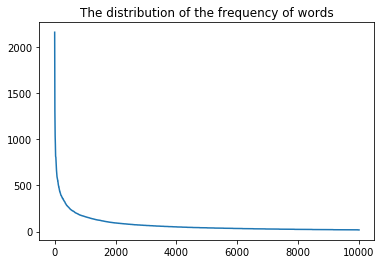

In [12]:
from collections import Counter
count_words = Counter(concat_words)
print("The most common words are:")
for word, count in count_words.most_common(10):
    print("%s occurs %d times" % (DICT[word], count))

print("\nThe least common words are:")
for word, count in count_words.most_common()[-10:]:
    print("%s occurs %d times" % (DICT[word], count))
    
print("\nThe longest words are:")
sorted_on_length = sorted(list(set(concat_words)), key=len, reverse=True)
for word in sorted_on_length[:10]:
    print(DICT[word])

labels, values = zip(*count_words.most_common(10000))
plt.plot(values)
plt.title("The distribution of the frequency of words")
plt.show()

## Conclusion
Hurray! We created the most complete palindromic sentence in the English language! Depending on the search depth for the depth-first search it is possible to not find a palindromic sentence for some words. However, I set the depth so deep this never happens. It's safe to assume that I included every word out of our dictionary in my palindromic sentence you can possible include. 

## Next steps
There are some next challenges I either want work on at another palindromic day, or that someone else can tackle. 

### The shortest complete palindromic sentence
While working on this I started wondering what the shortest complete palindromic sentence we can create is. Of course we can create palindromic sentences for every word, and then combine them in a way that covers the most unique words with the shortest sentence. This new problem is a disguised version of the [set cover problem](https://en.wikipedia.org/wiki/Set_cover_problem). The bad news is that this problem is NP-hard, which means that someone probably has to come up with a good heuristic to the problem. 

### Multi-threaded attempts
Although Norvig's solution finds a palindrome in 30 minutes, my solution only takes 10 minutes. However, I think we can parallelize it even more. I made an attempt to introduce multi-threading in my program. Unfortunately, Pythons Global Interpreter Lock hinders any speedup if we want to use only one instance of the dictionary... If you have any ideas on how to improve the speed of my program, please let me know or send in a pull request!

### Find a better dictionary
Let's be honest, the dictionary we use is terrible. I kept it as Norvig used it for his palindrome, so it offers a nice comparison to his work. However, it would be more impressive if the palindrome made a bit more sense. 